In [1]:
import numpy as np
#import modin.pandas as pd
import os
import time
import pandas as pd
from tqdm import tqdm
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
all_graduated = np.load('../all_graduated.npy').tolist()
#all_graduated = [x.lower() for x in all_graduated]
all_retired = np.load('../all_retired.npy').tolist()
#all_retired = [x.lower() for x in all_retired]

In [3]:
time_resolution = '1week'
data_path = '../network_data'+str(time_resolution)+'/'

c_path = '../network_data'+time_resolution+'/commits/'
e_path = '../network_data'+time_resolution+'/emails/'
#c_path = './network_data/commits/'
mix_path = data_path+"mix/"

In [4]:
df_tech_edges= pd.read_csv("../result_csv/tech_edges"+str(time_resolution)+".csv") 
df_social_edges= pd.read_csv("../result_csv/social_edges"+str(time_resolution)+".csv")

In [5]:
df_tech_edges.fillna(0).iloc[1:]

,Blur,VXQuery,SkyWalking,Hama,Wookie,HAWQ,Mnemonic,Graffito,TVM,SINGA,...,Hudi,Groovy,OGNL,Warble,CommonsRDF,RCF,Weex,Directory,JuiCE,Beam
1,1285,776.0,4121.0,661.0,714.0,1756.0,267.0,558.0,6981.0,1173.0,...,165.0,121.0,792.0,0.0,0.0,0.0,0.0,2.0,18.0,0.0
2,300,127.0,482.0,124.0,160.0,151.0,46.0,93.0,882.0,90.0,...,6.0,0.0,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,86,34.0,67.0,29.0,16.0,48.0,32.0,23.0,174.0,6.0,...,17.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21,7.0,10.0,16.0,5.0,9.0,5.0,11.0,103.0,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,12,1.0,0.0,5.0,1.0,1.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,9,0.0,0.0,10.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_social_edges.fillna(0)[1:]

,Rya,FtpServer,Blur,VXQuery,SkyWalking,NetBeans,Edgent,Hama,Wookie,S4,...,MyFaces,mod_ftp,cotton,geronimo,Kabuki,Pivot,Tika,tapestry,OGNL,RCF
1,552,146.0,280,120,282,7818,334,410,306,504,...,1784,20,0.0,350,8.0,122,30.0,58.0,728,0.0
2,96,30.0,54,14,12,676,88,54,72,98,...,168,10,0.0,32,0.0,20,6.0,0.0,202,0.0
3,30,0.0,8,6,16,186,26,32,18,24,...,42,0,0.0,14,0.0,4,0.0,0.0,60,0.0


In [7]:
all_g = list()
for x in df_tech_edges.columns:
    if x in all_graduated:
        all_g.append(x)
    elif x.lower() in all_graduated:
        all_g.append(x)

all_r = list()
for x in df_tech_edges.columns:
    if x in all_retired:
        all_r.append(x)
    elif x.lower() in all_retired:
        all_r.append(x)

In [8]:
df_tech_edges_graduated = df_tech_edges.fillna(0).iloc[2:][all_g]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_tech_edges))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_tech_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
#all_retired.remove('Weex')
df_tech_edges_retired = df_tech_edges.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : tech Networks")

[2, 3, 4, 5, 6, 7, 8, 9, 10]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Network Edges : tech Networks')

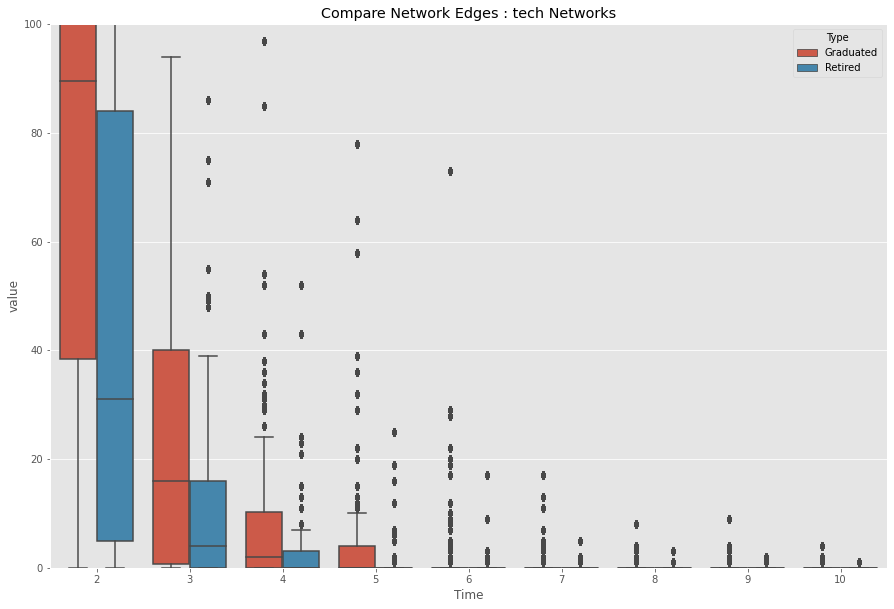

In [9]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 100)
plt.title("Compare Network Edges : tech Networks")

In [10]:
all_g = list()
for x in df_social_edges.columns:
    if x in all_graduated:
        all_g.append(x)
    elif x.lower() in all_graduated:
        all_g.append(x)

all_r = list()
for x in df_social_edges.columns:
    if x in all_retired:
        all_r.append(x)
    elif x.lower() in all_retired:
        all_r.append(x)

In [11]:
df_social_edges_graduated = df_social_edges.fillna(0).iloc[2:][all_g]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_social_edges))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_social_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
all_r = list()
for x in all_retired:
    if x in df_social_edges.columns:
        all_r.append(x) 
df_social_edges_retired = df_social_edges.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_social_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Edges : social Networks")

[2, 3]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Network Edges : Social Networks')

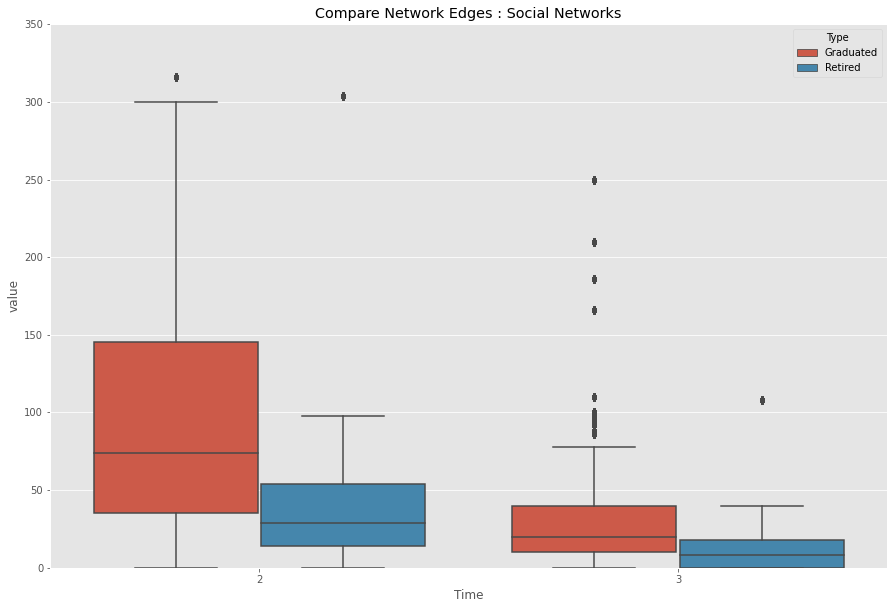

In [12]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 350)
plt.title("Compare Network Edges : Social Networks")

In [42]:
time_resolution = '2week'
data_path = './network_data'+str(time_resolution)+'/'

c_path = './network_data'+time_resolution+'/commits/'
e_path = './network_data'+time_resolution+'/emails/'
#c_path = './network_data/commits/'
mix_path = data_path+"mix/"

In [43]:
df_tech_edges= pd.read_csv("./tech_edges"+str(time_resolution)+".csv") 
df_social_edges= pd.read_csv("./social_edges"+str(time_resolution)+".csv")

In [44]:
df_tech_edges.fillna(0).iloc[1:]

,Etch,Impala,Shindig,NetBeans,Zeppelin,Rya,FreeMarker,stdcxx,OpenWhisk,Wave,...,TripleSoup,Onami,Corinthia,Warble,JuiCE,Climate Model Diagnostic Analyzer,Kalumet,Directory,composer,Concerted
1,1841,7054,3334,75981,1339,4845,1129,1209,4729,3843,...,279.0,625,3080,79.0,0.0,1034,317,527.0,0.0,0.0
2,216,642,638,1211,203,207,1349,166,473,122,...,0.0,30,5118,0.0,0.0,31,12,0.0,0.0,0.0


In [45]:
df_social_edges.fillna(0).iloc[2:]

,Myriad,Etch,SINGA,Impala,Shindig,Droids,NetBeans,Wave,Shiro,Zeppelin,...,RCF,NiFi,Traffic Server,Alois,Rave,Nutch,Onami,Tapestry,SocialSite,Kabuki
2,98,44.0,14.0,270,468,60.0,756,404.0,136,462,...,0.0,172.0,32.0,4.0,116,82.0,38.0,28.0,0.0,0.0
3,32,10.0,2.0,78,134,12.0,222,108.0,54,124,...,0.0,48.0,8.0,2.0,36,22.0,14.0,0.0,0.0,0.0
4,10,4.0,0.0,50,58,0.0,88,40.0,18,52,...,0.0,20.0,8.0,0.0,4,0.0,10.0,0.0,0.0,0.0
5,2,2.0,0.0,36,32,0.0,54,12.0,16,22,...,0.0,8.0,4.0,0.0,8,0.0,0.0,0.0,0.0,0.0
6,8,0.0,0.0,10,18,0.0,22,12.0,8,12,...,0.0,8.0,0.0,0.0,2,0.0,6.0,0.0,0.0,0.0
7,0,0.0,0.0,16,8,0.0,18,4.0,2,8,...,0.0,0.0,0.0,0.0,10,0.0,0.0,0.0,0.0,0.0
8,0,0.0,0.0,4,0,0.0,6,4.0,2,4,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
9,0,0.0,0.0,2,2,0.0,2,0.0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
10,2,0.0,0.0,0,0,0.0,4,0.0,0,0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [46]:
all_g = list()
for x in df_tech_edges.columns:
    if x in all_graduated:
        all_g.append(x)
    elif x.lower() in all_graduated:
        all_g.append(x)

all_r = list()
for x in df_tech_edges.columns:
    if x in all_retired:
        all_r.append(x)
    elif x.lower() in all_retired:
        all_r.append(x)

In [47]:
df_tech_edges_graduated = df_tech_edges.fillna(0).iloc[2:][all_g]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_tech_edges))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_tech_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
#all_retired.remove('Weex')
all_r = list()
for x in all_retired:
    if x in df_social_edges.columns:
        all_r.append(x) 
df_social_edges_retired = df_social_edges.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x*2 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : tech Networks")

[2]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Network Edges : tech Networks')

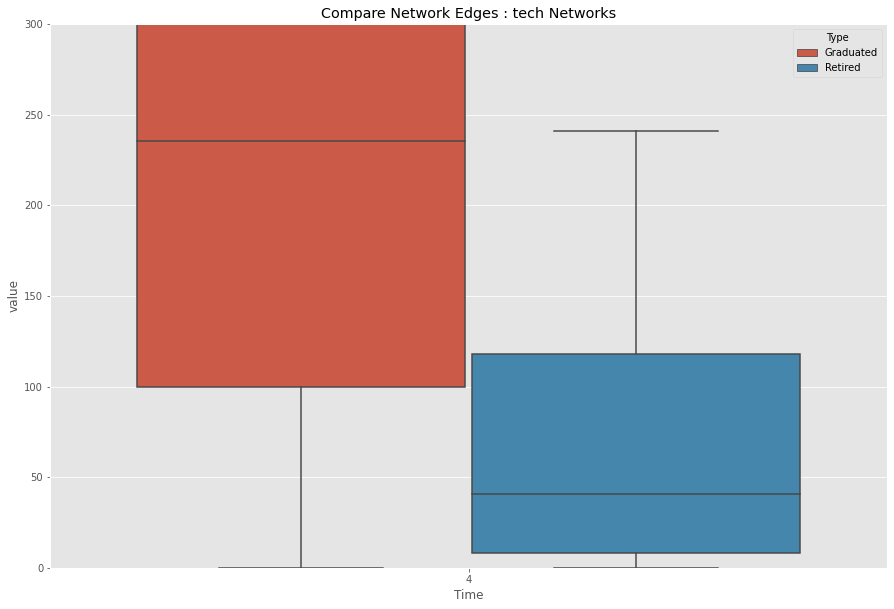

In [48]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 300)
#plt.xlim(0, 25)
plt.title("Compare Network Edges : tech Networks")

In [49]:
all_g = list()
for x in all_graduated:
    if x in df_social_edges.columns:
        all_g.append(x) 

In [50]:
df_social_edges_graduated = df_social_edges.fillna(0).iloc[2:][all_g]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_social_edges))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_social_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
all_r = list()
for x in all_retired:
    if x in df_social_edges.columns:
        all_r.append(x) 
df_social_edges_retired = df_social_edges.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_social_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x*2 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Edges : social Networks")

[2, 3, 4, 5, 6, 7, 8, 9, 10]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Network Edges : social Networks')

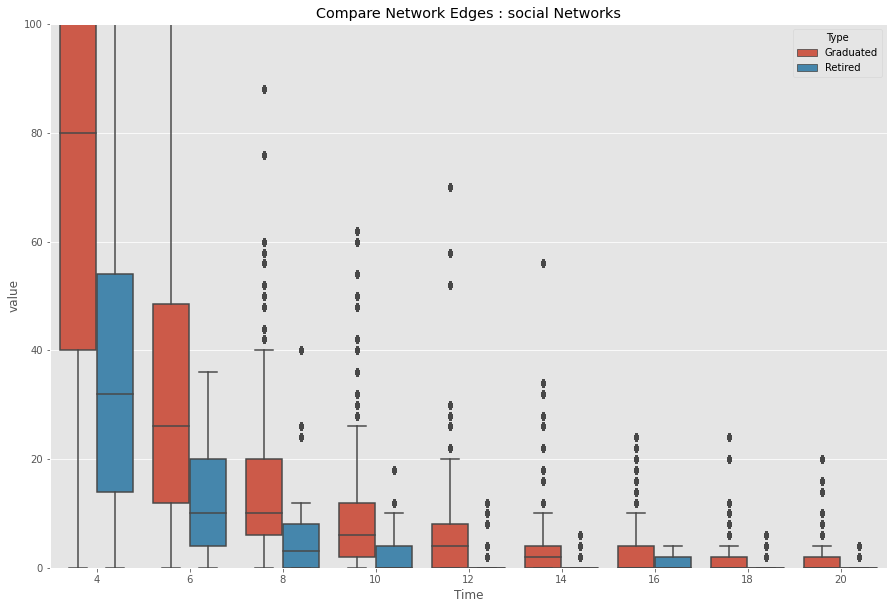

In [51]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 100)
#plt.xlim(0, 25)
plt.title("Compare Network Edges : social Networks")

In [23]:
time_resolution = '3week'
data_path = './network_data'+str(time_resolution)+'/'

c_path = './network_data'+time_resolution+'/commits/'
e_path = './network_data'+time_resolution+'/emails/'
#c_path = './network_data/commits/'
mix_path = data_path+"mix/"

df_tech_edges= pd.read_csv("./tech_edges"+str(time_resolution)+".csv") 
df_social_edges= pd.read_csv("./social_edges"+str(time_resolution)+".csv")

In [24]:
df_tech_edges_graduated = df_tech_edges.fillna(0).iloc[2:][all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_tech_edges))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_tech_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
all_r = list()
for x in all_retired:
    if x in df_tech_edges.columns:
        all_r.append(x) 
df_tech_edges_retired = df_tech_edges.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x*3 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : tech Networks")

[2, 3, 4, 5, 6, 7, 8]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Projects Average Overlap : tech Networks')

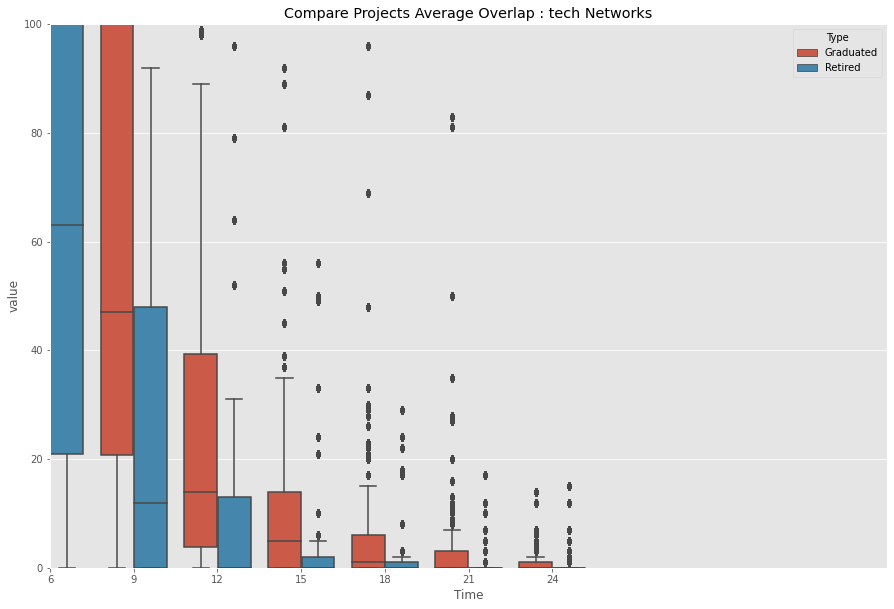

In [25]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 100)
plt.xlim(0, 10)
plt.title("Compare Projects Average Overlap : tech Networks")

In [26]:
df_social_edges_graduated = df_social_edges.fillna(0).iloc[2:][all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_social_edges))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_social_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
all_r = list()
for x in all_retired:
    if x in df_social_edges.columns:
        all_r.append(x) 
df_social_edges_retired = df_social_edges.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_social_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x*3 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Edges : social Networks")

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Network Edges : social Networks')

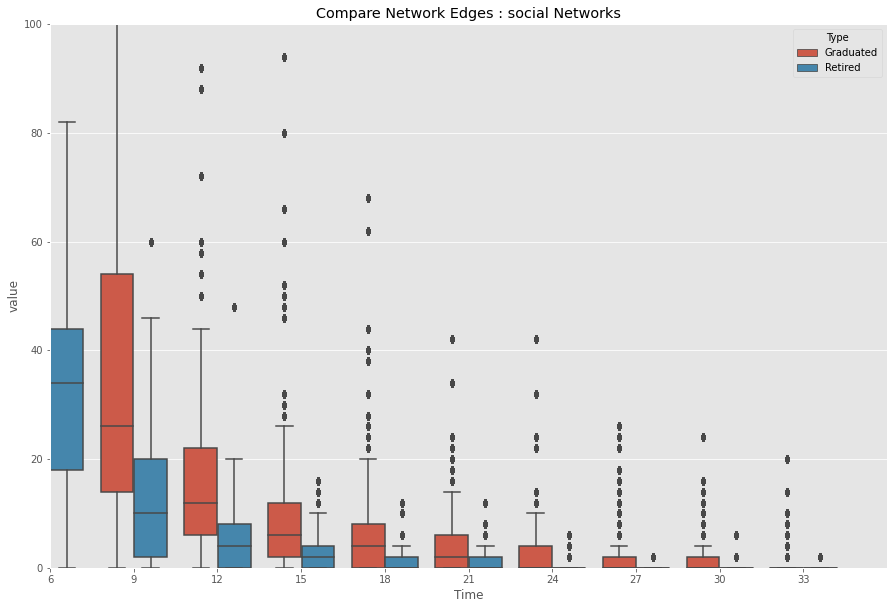

In [27]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 100)
plt.xlim(0, 10)
plt.title("Compare Network Edges : social Networks")

In [28]:
time_resolution = 1

#data_path = '/mnt/data0/proj_osgeo/data_ASF_trial/network_data'+str(time_resolution)+'/'

c_path = '../network_data'+str(time_resolution)+'/commits/'
e_path = '../network_data'+str(time_resolution)+'/emails/'
mix_path = '../network_data'+str(time_resolution)+'/mix/'
#c_path = './network_data/commits/'

df_tech_edges = pd.read_csv("../result_csv/tech_edges"+str(time_resolution)+".csv")
df_social_edges = pd.read_csv("../result_csv/social_edges"+str(time_resolution)+".csv")
df_mix_edges = pd.read_csv("../result_csv/mix_edges"+str(time_resolution)+".csv")


In [29]:
df_tech_edges.fillna(0).iloc[2:]

,Edgent,Hadoop Development Tools (HDT),Mnemonic,Juneau,ODF Toolkit,Zeta Components,Streams,Oozie,Roller,Nuvem,...,Hermes,Spark,Concerted,Nutch,Brooklyn,Kabuki,Traffic Server,Beam,Airflow,Directory
2,176,11.0,43,133,161.0,0.0,865,62,759,35,...,157,111,15.0,99,71.0,0.0,0.0,0.0,0.0,0.0
3,11,0.0,25,19,0.0,0.0,62,18,163,13,...,36,26,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df_social_edges.fillna(0).iloc[2:]

,Edgent,Hadoop Development Tools (HDT),Mnemonic,Juneau,ODF Toolkit,Taverna,Zeta Components,Streams,Oozie,Roller,...,Concerted,APISIX,Lens,Subversion,juddi,MyFaces,WebWork 2,MetaModel,Hermes,Kabuki
2,90,38.0,102.0,28,92,88,52.0,44.0,78.0,234,...,30.0,98,66.0,236.0,20.0,0.0,1412.0,22,2.0,0.0
3,30,14.0,28.0,8,20,42,20.0,16.0,22.0,76,...,10.0,34,26.0,40.0,0.0,0.0,164.0,4,2.0,0.0
4,20,6.0,16.0,8,6,24,0.0,18.0,2.0,20,...,0.0,38,16.0,0.0,0.0,0.0,38.0,4,0.0,0.0
5,2,0.0,0.0,2,6,10,0.0,4.0,6.0,38,...,2.0,16,6.0,0.0,0.0,0.0,0.0,0,0.0,0.0
6,10,0.0,0.0,0,8,16,0.0,6.0,6.0,24,...,0.0,8,4.0,0.0,0.0,0.0,0.0,8,0.0,0.0
7,2,0.0,0.0,0,4,4,0.0,2.0,0.0,4,...,0.0,2,2.0,0.0,0.0,0.0,0.0,0,0.0,0.0
8,0,0.0,0.0,2,2,4,0.0,0.0,2.0,4,...,0.0,2,8.0,0.0,0.0,0.0,0.0,2,0.0,0.0
9,0,0.0,0.0,4,0,0,0.0,0.0,0.0,2,...,0.0,2,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [31]:
df_tech_edges_graduated = df_tech_edges.fillna(0).iloc[2:][all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_tech_edges))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_tech_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
all_r = list()
for x in all_retired:
    if x in df_tech_edges.columns:
        all_r.append(x) 
df_tech_edges_retired = df_tech_edges.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_tech_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x*4 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Average Overlap : tech Networks")

[2, 3]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Projects Average Overlap : tech Networks')

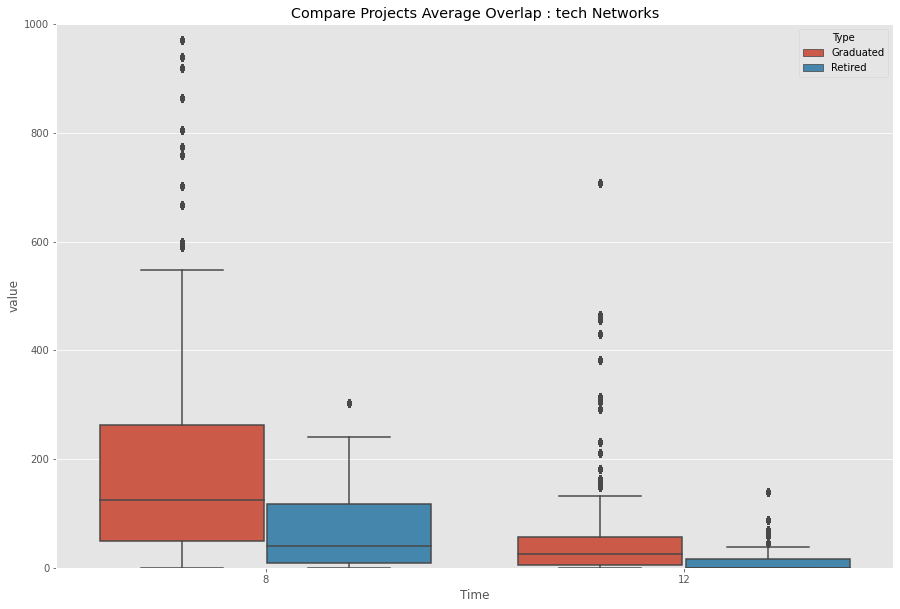

In [32]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 1000)
#plt.xlim(0, 10)
plt.title("Compare Projects Average Overlap : tech Networks")

In [33]:
df_social_edges_graduated = df_social_edges.fillna(0).iloc[2:][all_graduated]
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
labels_time = [x for x in range(2, len(df_social_edges))]

#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_graduated = []

for time in labels_time:
    data_thistime = df_social_edges_graduated.loc[time]
    datas_t_graduated.append(data_thistime)



#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'orangered', 'facecolor':'pink'})
all_r = list()
for x in all_retired:
    if x in df_social_edges.columns:
        all_r.append(x) 
df_social_edges_retired = df_social_edges.fillna(0).iloc[2:][all_r]


#count = count[:20]
#plt.bar(range(20),np.array(count)/265)
datas_t_retired = []
#for i in range(len(labels_time)):
#    labels_time[i]+=1
print(labels_time)
for time in labels_time:
    data_thistime = df_social_edges_retired.loc[time]
    datas_t_retired.append(data_thistime)


labels_time = [x*3 for x in labels_time]
df = pd.DataFrame({'Time':labels_time,\
                  'Graduated':datas_t_graduated,'Retired':datas_t_retired})
#plt.boxplot(datas_t, labels=labels_time, patch_artist= True, boxprops={'color':'lightblue', 'facecolor':'lightgreen'})
df = df[['Time','Graduated','Retired']]

#plt.title("Compare Projects Edges : social Networks")

[2, 3, 4, 5, 6, 7, 8, 9]


<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Compare Network Edges : social Networks')

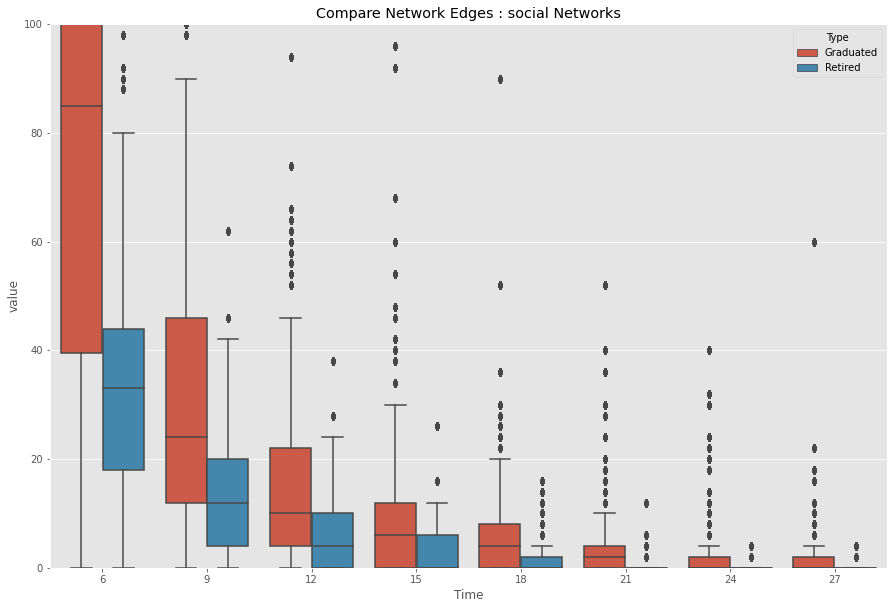

In [34]:
df = df.explode("Graduated")
df = df.explode("Retired")
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

dd=pd.melt(df,id_vars=['Time'],value_vars=['Graduated','Retired'],var_name='Type')
sns.boxplot(x='Time',y='value',data=dd,hue='Type')
plt.ylim(0, 100)
#plt.xlim(0, 10)
plt.title("Compare Network Edges : social Networks")